In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from datetime import datetime
import datetime as dt

In [3]:
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
conda install -c conda-forge lightgbm


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\letsh\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    lightgbm-4.3.0             |  py311h5da7b33_0         1.2 MB
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-4.3.0-py311h5da7b33_0 




lightgbm-4.3.0       | 1.2 MB    |            |   0% 
lightgbm-4.3.0       | 1.2 MB    | 1          |   1% 
lightgbm-4.3.0       | 1.2 MB    | 2          |   3% 
lightgbm-4.3.0       | 1.2 MB    | 5          |   5% 
lightgbm-4.3.0       | 1.2 MB    | #          |  10% 
lightgbm-4.3.0       | 1.2 MB    | #6         |  17% 
lightgbm-4.3.0       | 1.2 MB    | ##1        |  22% 
lightgb

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:url

In [121]:

conda install -c conda-forge lightgbm



Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

pd.pandas.set_option('display.max_columns',None)

In [18]:
import pandas as pd

file_path = r'C:\Users\letsh\Downloads\SeoulBikeData.csv'

try:
    bike_df = pd.read_csv(file_path, encoding='latin1')
except UnicodeDecodeError:
    try:
        bike_df = pd.read_csv(file_path, encoding='iso-8859-1')
    except UnicodeDecodeError:
        bike_df = pd.read_csv(file_path, encoding='cp1252')

print(bike_df.head())


         Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   


In [19]:
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [20]:
bike_df.shape

(8760, 14)

In [21]:
print(f'number of rows : {bike_df.shape[0]}  \nnumber of columns : {bike_df.shape[1]}')

number of rows : 8760  
number of columns : 14


In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [23]:
value = len(bike_df[bike_df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


In [24]:
print(bike_df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [25]:
conda install -c conda-forge missingno

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urll

<Axes: >

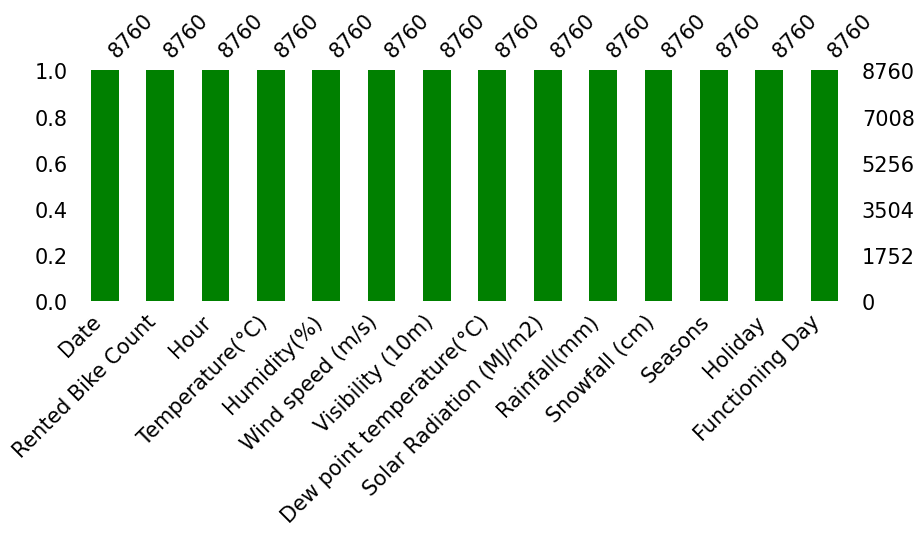

In [26]:
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

<Axes: >

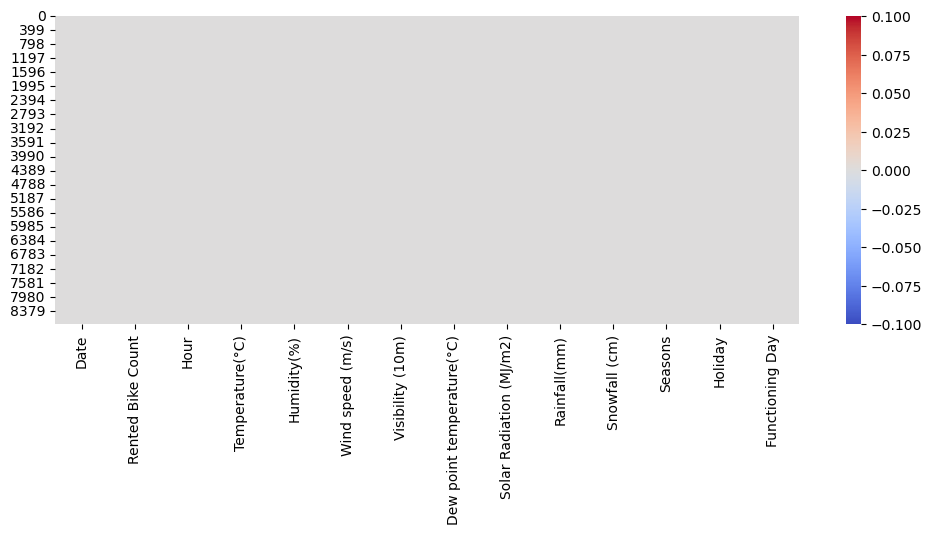

In [27]:
plt.figure(figsize=(12,4))
sns.heatmap(bike_df.isna(), cmap = 'coolwarm')

In [28]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [29]:
bike_df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [30]:
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [31]:
for i in bike_df.columns.tolist():
  print("No. of unique values in ",i,"is",bike_df[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


In [32]:
bike_df=bike_df.rename(columns={'Rented Bike Count':'rented_bike_count',
                                'Date':'date',
                                'Hour':'hour',
                                'Seasons':'seasons',
                                'Holiday':'holiday',
                                'Temperature(°C)':'temperature',
                                'Humidity(%)':'humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'visibility',
                                'Dew point temperature(°C)':'dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'solar_radiation',
                                'Rainfall(mm)':'rainfall',
                                'Snowfall (cm)':'snowfall',
                                'Functioning Day':'functioning_day'})

In [33]:
bike_df.date = pd.to_datetime(bike_df.date)

bike_df['day'] = bike_df['date'].dt.day
bike_df['month'] = bike_df['date'].dt.month
bike_df['year'] = bike_df['date'].dt.year
bike_df['weekday'] = bike_df['date'].dt.day_name()

bike_df.drop('date', axis=1, inplace=True)

In [34]:
bike_df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [35]:
def session(x):
   
    ''' 
    For exploratory data analysis (EDA) purposes, the "Hour" column can be converted into categorical variables
    such as "Morning", "Noon", and "Night", without altering the existing label encoding format of the "Hour" column. 
    This conversion is not necessary for model training.
    '''
    
    if x>4 and x<=8:
        return 'Early Morning'
    elif x>8 and x<=12:
        return 'Morning'
    elif x>12 and x<=16:
        return 'Afternoon'
    elif x>16 and x<=20:
        return 'Evening'
    elif x>20 and x<=24:
        return 'Night'
    elif x<=4:
        return 'Late Night'

bike_df['session'] = bike_df['hour'].apply(session)

In [36]:
print(f'Min Count: {bike_df.rented_bike_count.min()}')
print(f'Max Count: {bike_df.rented_bike_count.max()}')

Min Count: 0
Max Count: 3556


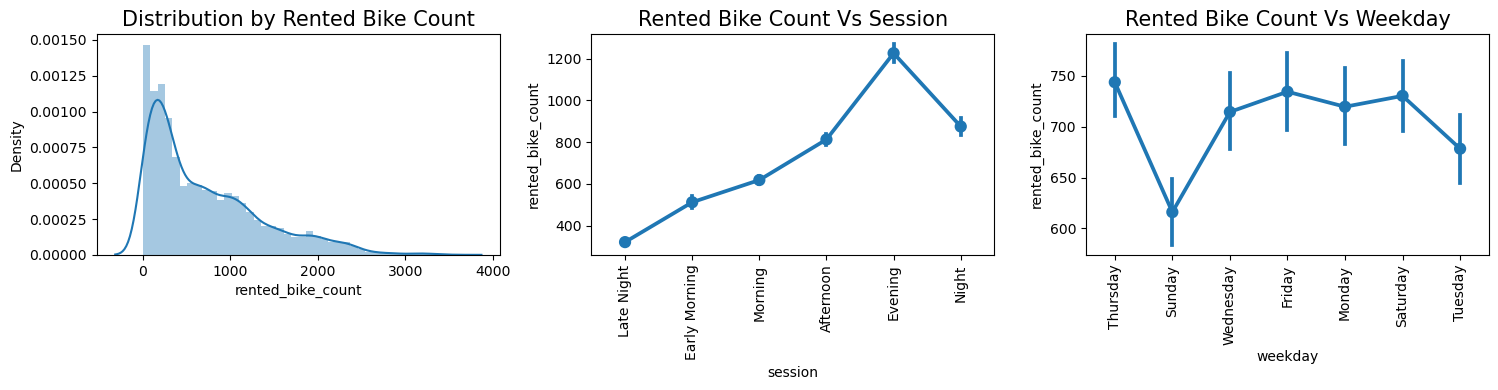

In [37]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df['rented_bike_count'], ax=ax[0])
dist.set_title('Distribution by Rented Bike Count', size=15)


point = sns.pointplot(data=bike_df, x='session', y='rented_bike_count', ax=ax[1])
point.set_title('Rented Bike Count Vs Session', size=15)
point.set_xticklabels(point.get_xticklabels(), rotation=90)

point = sns.pointplot(data=bike_df, x='weekday', y='rented_bike_count', ax=ax[2])
point.set_title('Rented Bike Count Vs Weekday', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

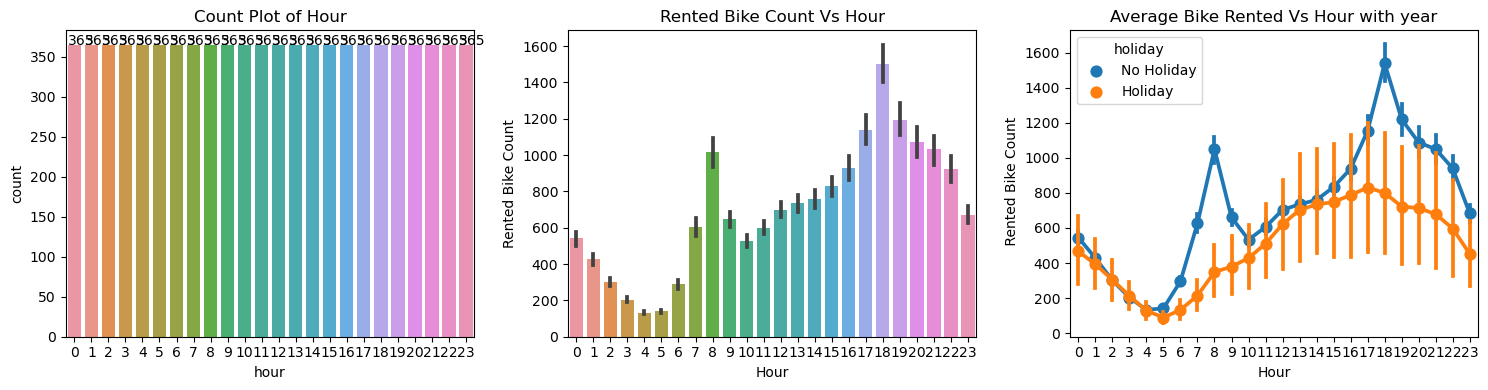

In [38]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

count = sns.countplot(data=bike_df, x='hour', ax=ax[0])
count.set_title('Count Plot of Hour')

for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

bar = sns.barplot(data=bike_df, x='hour', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Hour', ylabel='Rented Bike Count', title='Rented Bike Count Vs Hour')

point = sns.pointplot(data=bike_df, x='hour', y='rented_bike_count', hue='holiday', ax= ax[2])
point.set(xlabel='Hour', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Hour with year')

plt.tight_layout()
plt.show()

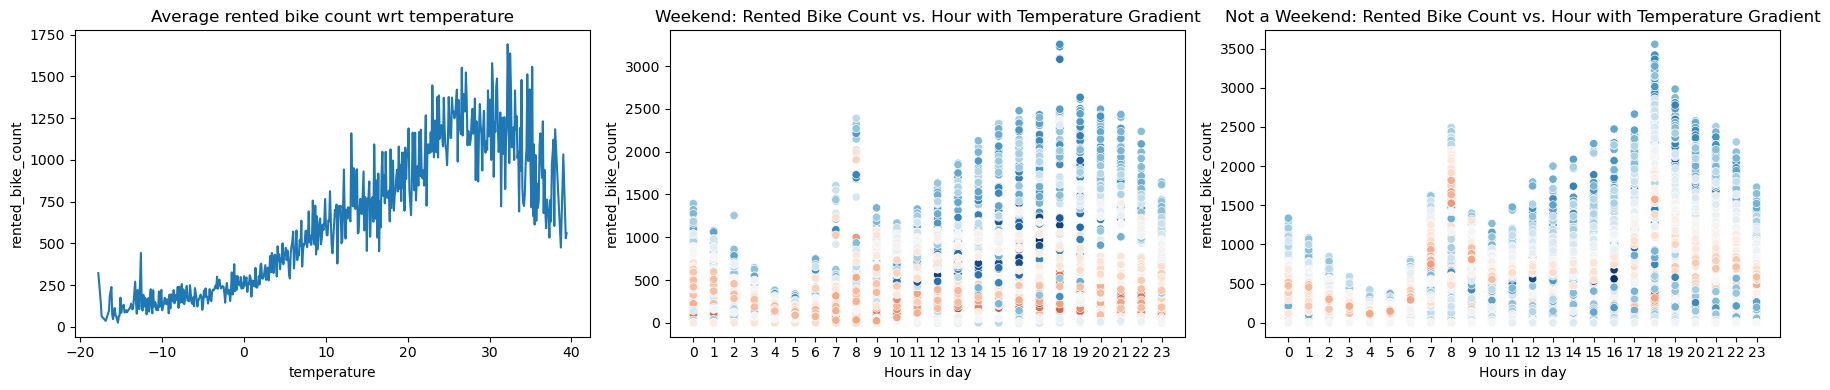

In [39]:
fig,ax = plt.subplots(1,3, figsize=(18,4))

temp_wrt_bike_rent_count = bike_df.groupby(['temperature'])['rented_bike_count'].mean().reset_index()

line = sns.lineplot(x = 'temperature', y ='rented_bike_count', data = temp_wrt_bike_rent_count, ax = ax[0])
line.set_title('Average rented bike count wrt temperature')

bike_df_nw = bike_df[(bike_df.weekday != 'Saturday') & (bike_df.weekday != 'Sunday')]
bike_df_w = bike_df[(bike_df.weekday == 'Saturday') | (bike_df.weekday == 'Sunday')]

scatter2 = sns.scatterplot(x=bike_df_w.hour, y=bike_df_w['rented_bike_count'], c=bike_df_w.temperature, cmap="RdBu", ax =ax[1])
scatter2.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter2.set_title('Weekend: Rented Bike Count vs. Hour with Temperature Gradient')

scatter = sns.scatterplot(x=bike_df_nw.hour, y=bike_df_nw['rented_bike_count'], c=bike_df_nw.temperature,cmap="RdBu", ax = ax[2])
scatter.set(xticks = range(24), xlabel='Hours in day', ylabel='rented_bike_count')
scatter.set_title('Not a Weekend: Rented Bike Count vs. Hour with Temperature Gradient')
plt.tight_layout()
plt.show()


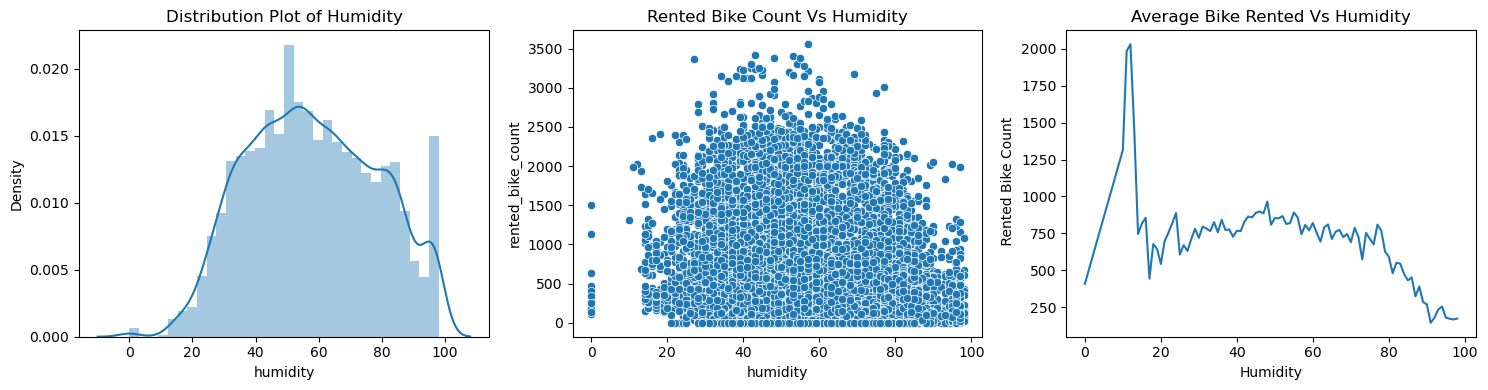

In [40]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.humidity, ax = ax[0])
dist.set_title('Distribution Plot of Humidity')

scatter = sns.scatterplot(data=bike_df, x='humidity', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='humidity', ylabel='rented_bike_count', title='Rented Bike Count Vs Humidity')

group_wind_speed = bike_df.groupby(['humidity'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='humidity', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Humidity', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Humidity')

plt.tight_layout()
plt.show()

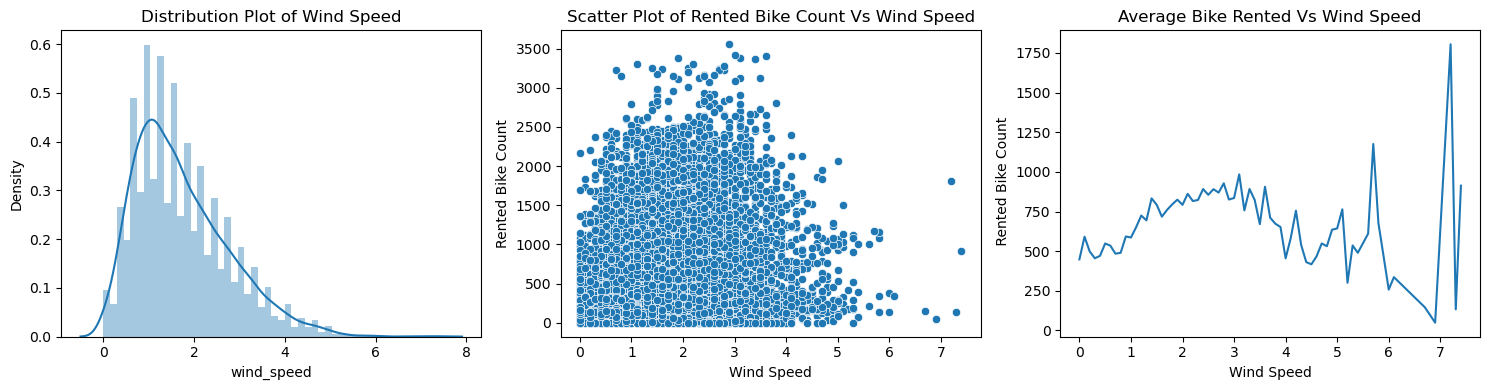

In [41]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.wind_speed, ax = ax[0])
dist.set_title('Distribution Plot of Wind Speed')

scatter = sns.scatterplot(data=bike_df, x='wind_speed', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Wind Speed', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Wind Speed')

group_wind_speed = bike_df.groupby(['wind_speed'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_wind_speed, x='wind_speed', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Wind Speed', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Wind Speed')

plt.tight_layout()
plt.show()

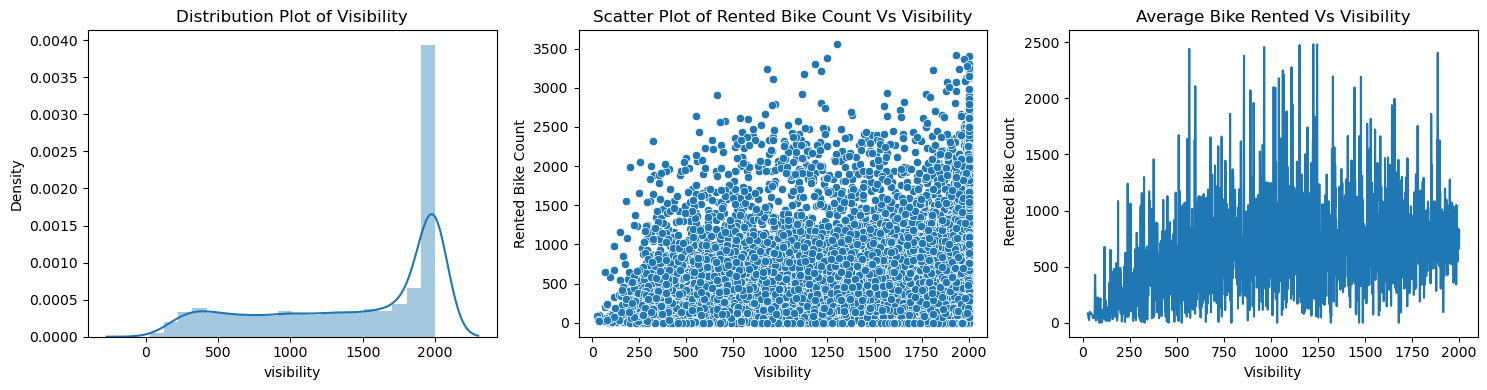

In [42]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.visibility, ax = ax[0])
dist.set_title('Distribution Plot of Visibility')

scatter = sns.scatterplot(data=bike_df, x='visibility', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Visibility', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Visibility')

group_visibility = bike_df.groupby(['visibility'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data=group_visibility, x='visibility', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Visibility', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Visibility')

plt.tight_layout()
plt.show()

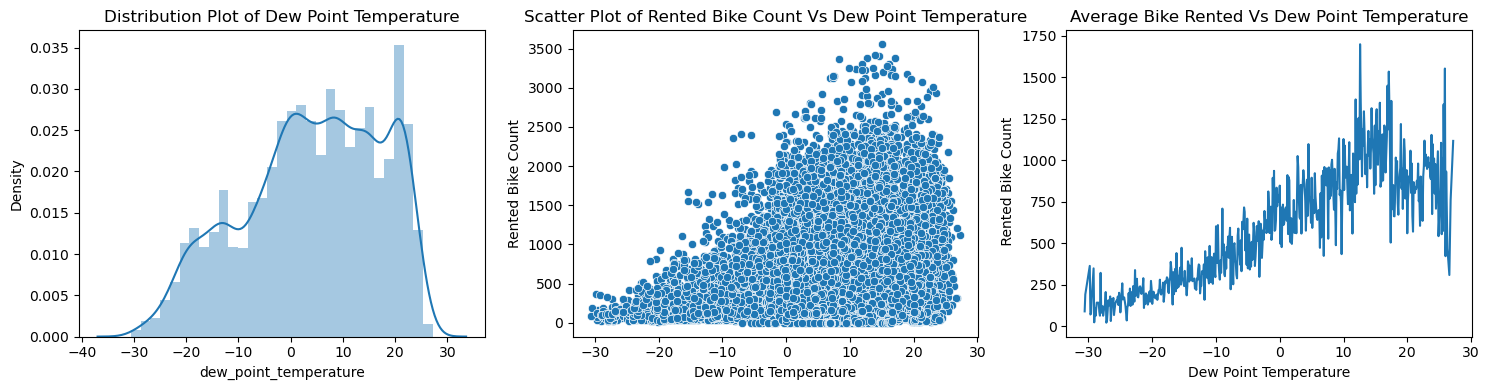

In [43]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.dew_point_temperature, ax = ax[0])
dist.set_title('Distribution Plot of Dew Point Temperature')

scatter = sns.scatterplot(data=bike_df, x='dew_point_temperature', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Dew Point Temperature', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Dew Point Temperature')

group_dew_point_temperature = bike_df.groupby(['dew_point_temperature'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_dew_point_temperature, x ='dew_point_temperature', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Dew Point Temperature', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Dew Point Temperature')

plt.tight_layout()
plt.show()

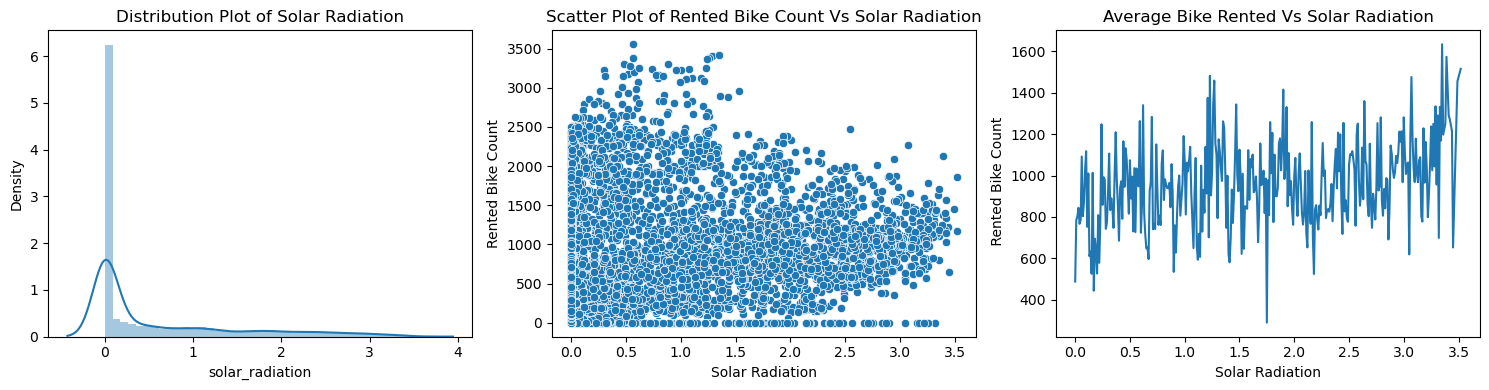

In [44]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.solar_radiation, ax = ax[0])
dist.set_title('Distribution Plot of Solar Radiation')

scatter = sns.scatterplot(data=bike_df, x='solar_radiation', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Solar Radiation', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Solar Radiation')

group_solar_radiation = bike_df.groupby(['solar_radiation'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_solar_radiation, x ='solar_radiation', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Solar Radiation', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Solar Radiation')

plt.tight_layout()
plt.show()

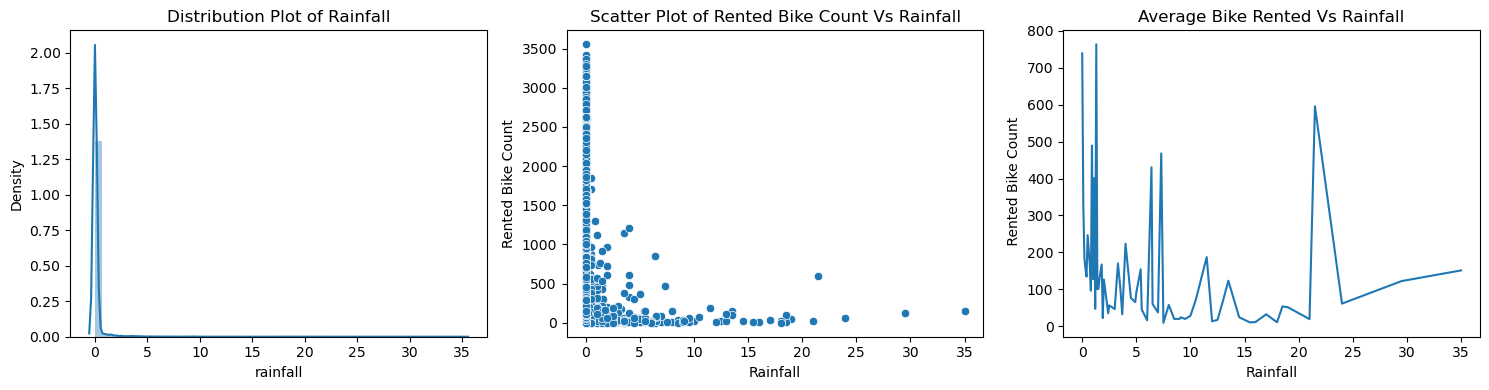

In [45]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.rainfall, ax = ax[0])
dist.set_title('Distribution Plot of Rainfall')

scatter = sns.scatterplot(data=bike_df, x='rainfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Rainfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Rainfall')

group_rainfall = bike_df.groupby(['rainfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_rainfall, x ='rainfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Rainfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Rainfall')

plt.tight_layout()
plt.show()

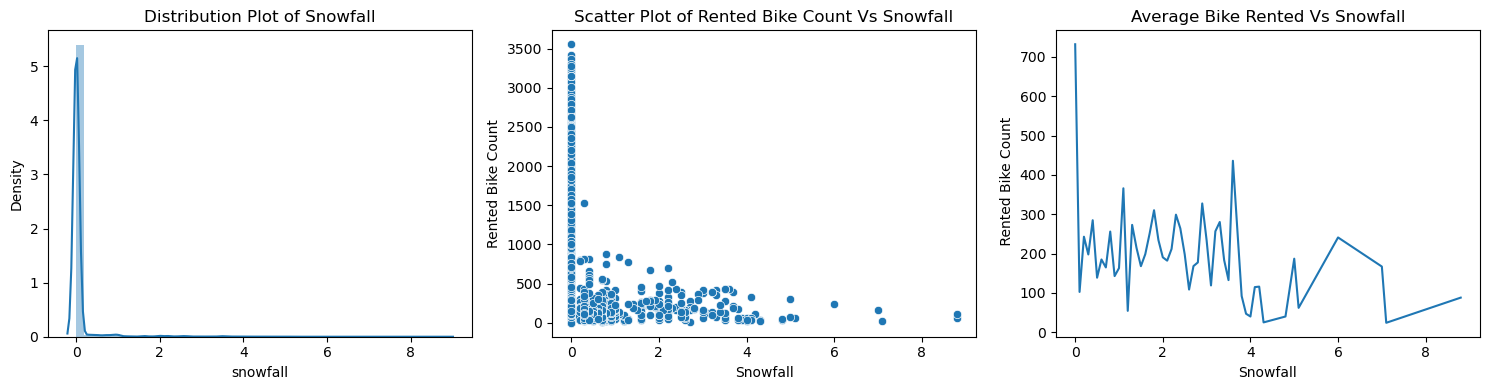

In [46]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

dist = sns.distplot(bike_df.snowfall, ax = ax[0])
dist.set_title('Distribution Plot of Snowfall')

scatter = sns.scatterplot(data=bike_df, x='snowfall', y='rented_bike_count', ax = ax[1])
scatter.set(xlabel='Snowfall', ylabel='Rented Bike Count', title='Scatter Plot of Rented Bike Count Vs Snowfall')

group_snowfall = bike_df.groupby(['snowfall'])['rented_bike_count'].mean().reset_index()
line = sns.lineplot(data = group_snowfall, x ='snowfall', y = 'rented_bike_count', ax= ax[2])
line.set(xlabel='Snowfall', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Snowfall')

plt.tight_layout()
plt.show()

ValueError: Could not interpret input 'holiday'

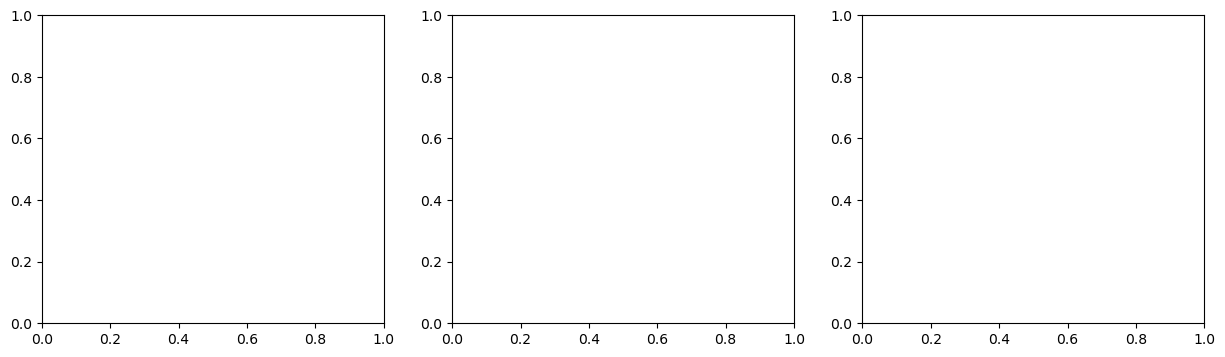

In [128]:
fig,ax = plt.subplots(1,3, figsize=(15,4))

# Univariate analysis
count = sns.countplot(data=bike_df, x='holiday', ax=ax[0])
count.set_title('Count Plot of Holiday')

# adding value count on the top of bar
for p in count.patches:
    count.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

# Bi-variate analysis 
# Rented Bike Count Vs Holiday
bar = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', ax = ax[1])
bar.set(xlabel='Holiday', ylabel='Rented Bike Count', title='Rented Bike Count Vs Holiday')

# Multi-variate analysis
cat = sns.barplot(data=bike_df, x='holiday', y='rented_bike_count', hue='year', ax= ax[2])
cat.set(xlabel='Holiday', ylabel = ' Rented Bike Count', title='Average Bike Rented Vs Holiday with year')

plt.tight_layout()
plt.show()

In [129]:
bike_df.duplicated().sum()

0

In [51]:
print(bike_df.isnull().sum())

rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
day                      0
month                    0
year                     0
weekday                  0
session                  0
dtype: int64


<Axes: >

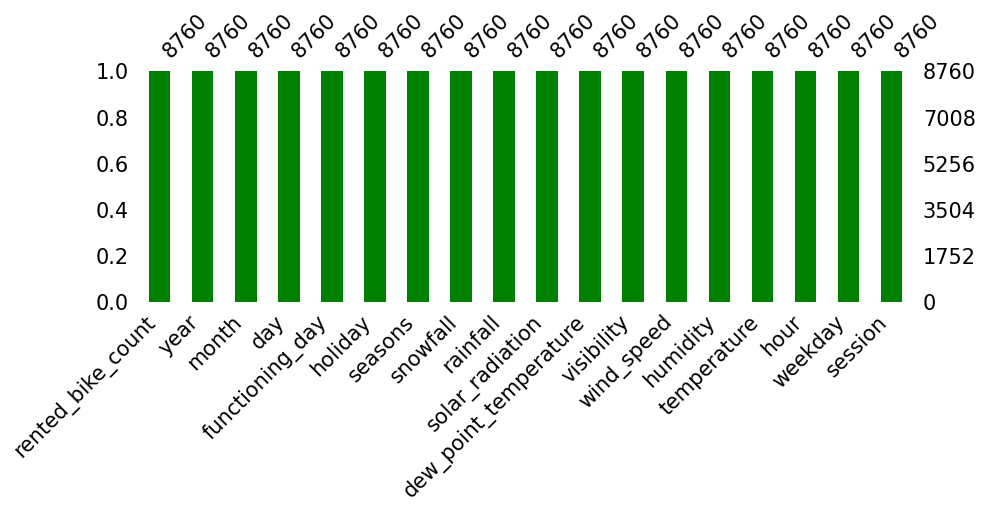

In [52]:
import missingno as msno
msno.bar(bike_df, color='green',sort='ascending', figsize=(10,3), fontsize=15)

In [53]:
bike_df.describe().T

count         mean         std     min      25%  \
rented_bike_count      8760.0   704.602055  644.997468     0.0   191.00   
hour                   8760.0    11.500000    6.922582     0.0     5.75   
temperature            8760.0    12.882922   11.944825   -17.8     3.50   
humidity               8760.0    58.226256   20.362413     0.0    42.00   
wind_speed             8760.0     1.724909    1.036300     0.0     0.90   
visibility             8760.0  1436.825799  608.298712    27.0   940.00   
dew_point_temperature  8760.0     4.073813   13.060369   -30.6    -4.70   
solar_radiation        8760.0     0.569111    0.868746     0.0     0.00   
rainfall               8760.0     0.148687    1.128193     0.0     0.00   
snowfall               8760.0     0.075068    0.436746     0.0     0.00   
day                    8760.0    15.720548    8.796749     1.0     8.00   
month                  8760.0     6.526027    3.448048     1.0     4.00   
year                   8760.0  2017.915068    0.278796  2017.0  2018.00   

                           50%      75%      max  
rented_bike_count       504.50  1065.25  3556.00  
hour                     11.50    17.25    23.00  
temperature              13.70    22.50    39.40  
humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
visibility             1698.00  2000.00  2000.00  
dew_point_temperature     5.10    14.80    27.20  
solar_radiation           0.01     0.93     3.52  
rainfall                  0.00     0.00    35.00  
snowfall                  0.00     0.00     8.80  
day                      16.00    23.00    31.00  
month                     7.00    10.00    12.00  
year                   2018.00  2018.00  2018.00

In [54]:
numerical_features = []
categorical_features = []

'''
If feature has more than 35 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''
for col in bike_df.columns:  
  if bike_df[col].nunique() > 35:
    numerical_features.append(col) 
  else:
    categorical_features.append(col) 

print(f'Numerical Features : {numerical_features}')
print(f'Categorical Features : {categorical_features}')

Numerical Features : ['rented_bike_count', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']
Categorical Features : ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'year', 'weekday', 'session']


In [55]:
numerical_features.remove('rented_bike_count')
numerical_features.remove('rainfall')
numerical_features.remove('snowfall')

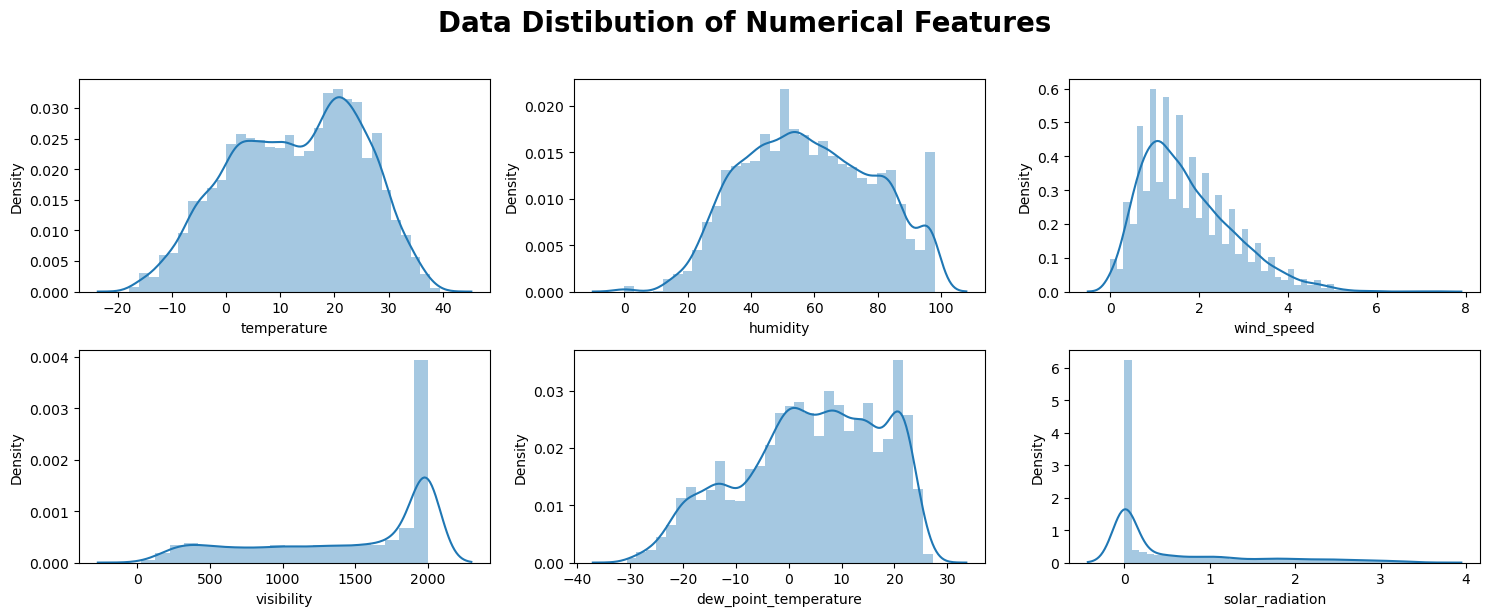

In [56]:
plt.figure(figsize=(15,6))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                      

  sns.distplot(bike_df[col])  
  plt.xlabel(col)
  plt.tight_layout()   

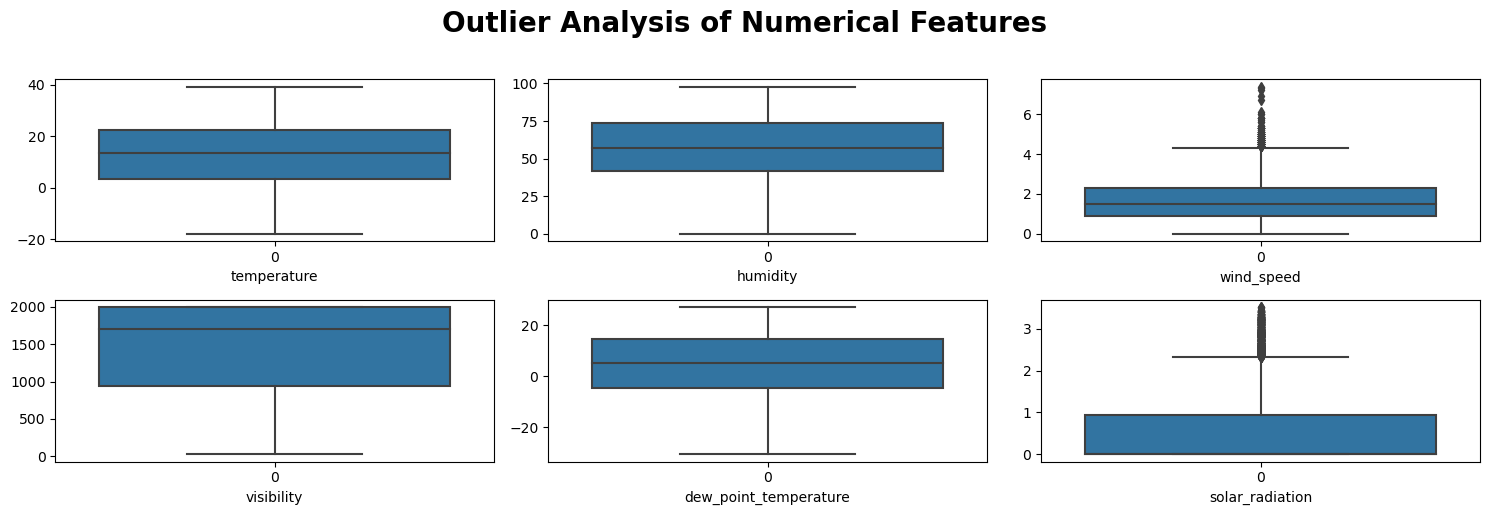

In [57]:
plt.figure(figsize=(15,5))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)            

  sns.boxplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

In [58]:
def clip_outliers(bike_df):
    for col in bike_df[numerical_features]:
        q1 = bike_df[col].quantile(0.25)
        q3 = bike_df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        bike_df[col] = bike_df[col].clip(lower_bound, upper_bound)
    return bike_df

In [59]:
bike_df = clip_outliers(bike_df)

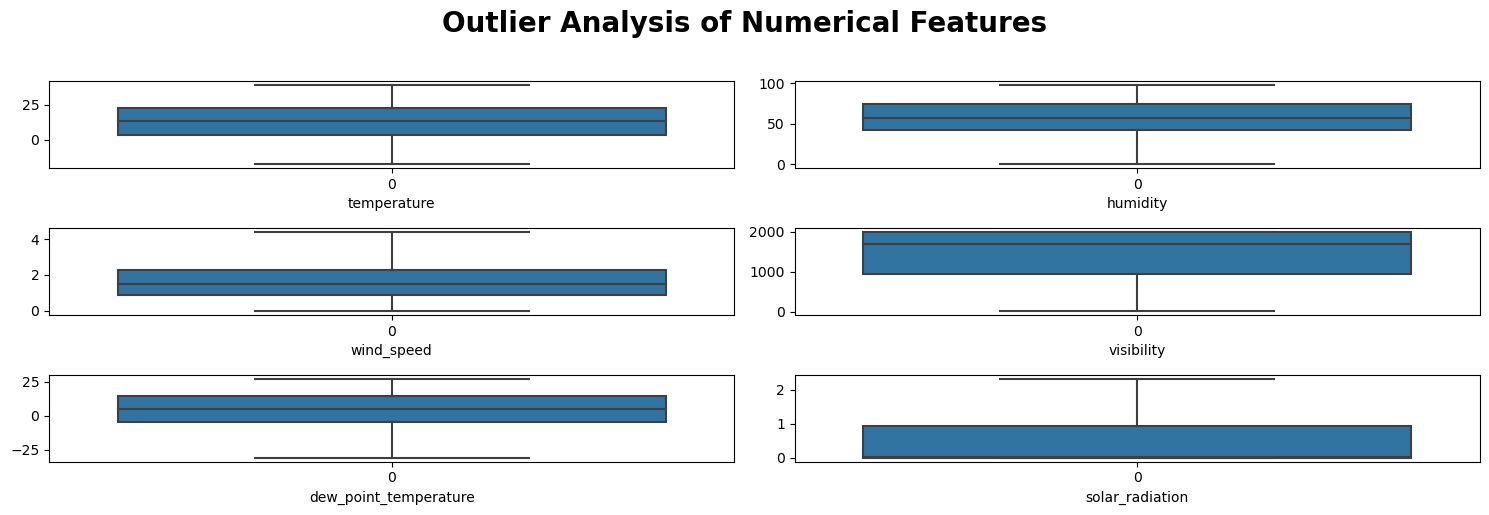

In [60]:

plt.figure(figsize=(15,5))
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)           

  sns.boxplot(bike_df[col])
  plt.xlabel(col)
  plt.tight_layout()

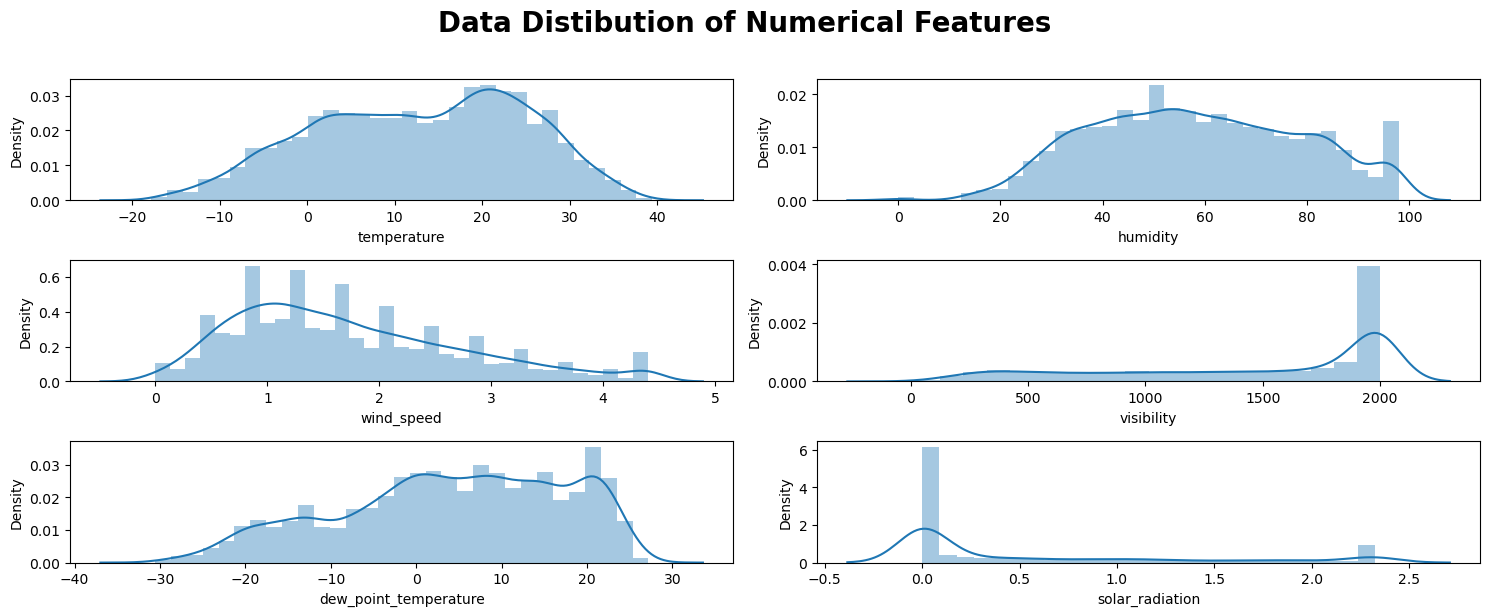

In [61]:
plt.figure(figsize=(15,6))
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(3, 2, i+1)                       

  sns.distplot(bike_df[col])  
  plt.xlabel(col)
  plt.tight_layout()  

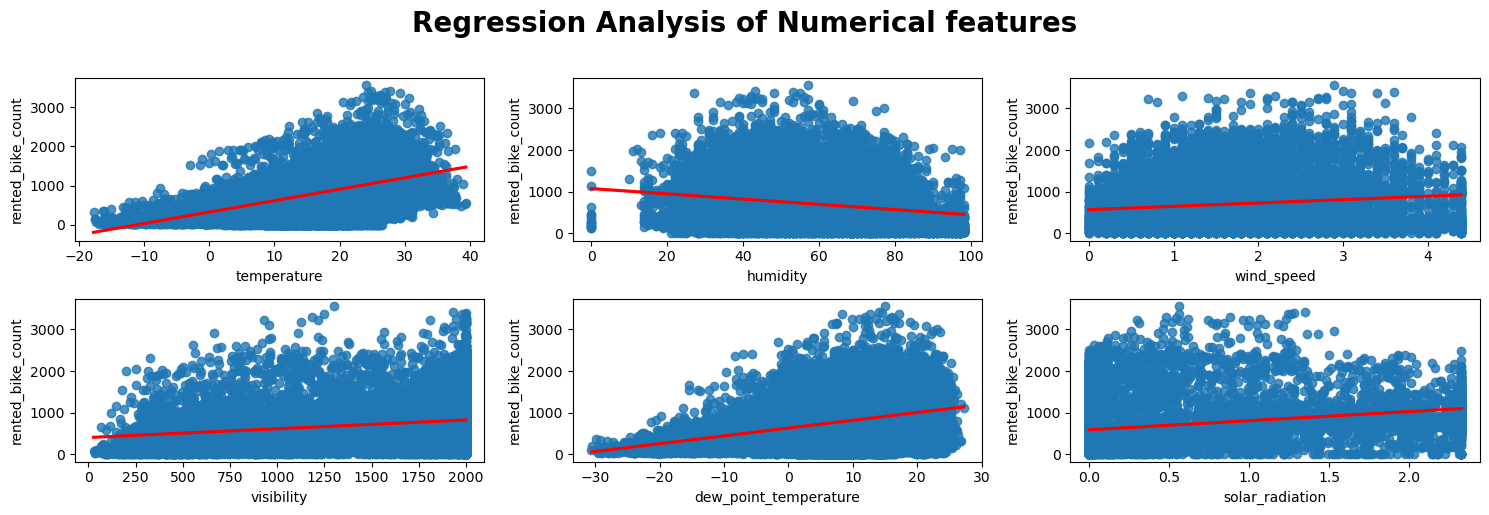

In [63]:

plt.figure(figsize=(15,5))
plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numerical_features):
  plt.subplot(2, 3, i+1)                     

  sns.regplot(x=bike_df[col], y='rented_bike_count', data=bike_df, line_kws={"color":"r"})
  plt.xlabel(col)
  plt.tight_layout()

<Axes: >

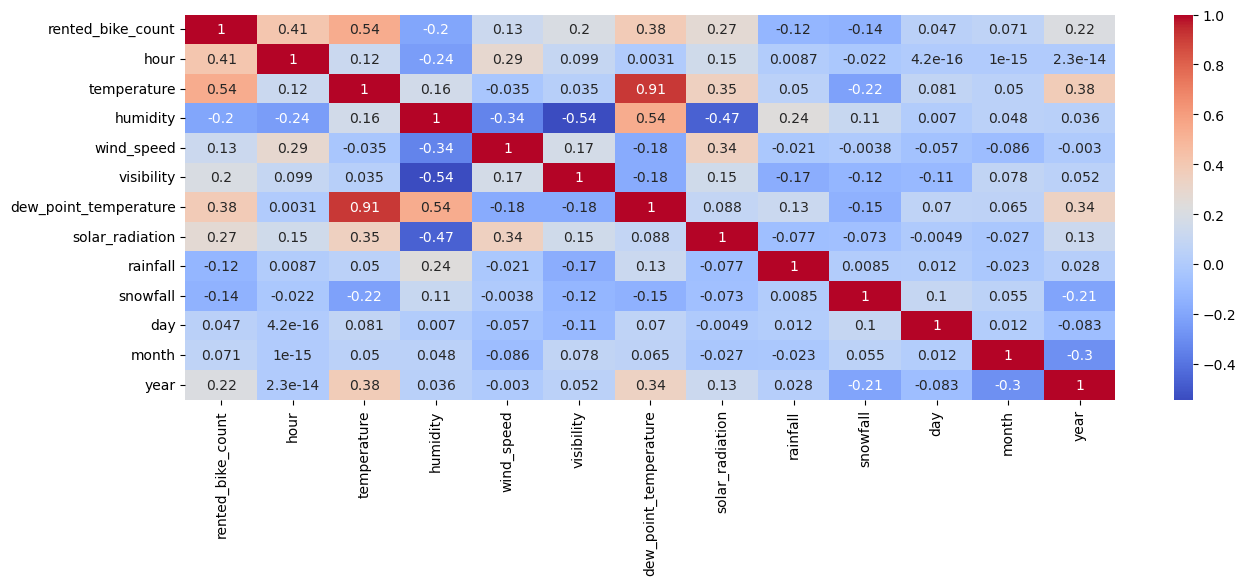

In [64]:
plt.figure(figsize=(15,5))
sns.heatmap(bike_df.corr(), annot=True, cmap='coolwarm')  

In [65]:
def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
correlation(bike_df, 0.7)   

{'dew_point_temperature'}

In [67]:
bike_df.drop('dew_point_temperature', axis=1, inplace=True)

In [72]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    """
    Calculate Variance Inflation Factor (VIF) for each feature in the dataset.
    
    Parameters:
    X (pd.DataFrame): The input features dataframe.

    Returns:
    pd.DataFrame: A dataframe with VIF values and corresponding feature names.
    """
    vif = pd.DataFrame()
    
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    
    return vif


In [73]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.152630  rented_bike_count
1     5.055598               hour
2     4.967449        temperature
3    24.956820           humidity
4     5.052784         wind_speed
5    10.660305         visibility
6     2.904267    solar_radiation
7     1.110419           rainfall
8     1.147299           snowfall
9     4.419318                day
10    4.744662              month
11   64.674491               year

In [74]:
bike_df.drop('year', axis=1, inplace=True)

bike_df.drop('weekday', axis=1, inplace=True)         
bike_df.drop('session', axis=1, inplace=True)      

In [75]:
calc_vif(bike_df[[i for i in bike_df.describe().columns]])

VIF Factor           features
0     4.112963  rented_bike_count
1     4.717261               hour
2     4.455828        temperature
3     7.106271           humidity
4     4.833217         wind_speed
5     5.554467         visibility
6     2.368061    solar_radiation
7     1.104537           rainfall
8     1.136376           snowfall
9     3.859202                day
10    4.640307              month

In [76]:
categorical_features.remove('year')
categorical_features.remove('weekday')
categorical_features.remove('session')

for i in categorical_features:
  print("No. of unique values in",i,"is",bike_df[i].nunique())

No. of unique values in hour is 24
No. of unique values in seasons is 4
No. of unique values in holiday is 2
No. of unique values in functioning_day is 2
No. of unique values in day is 31
No. of unique values in month is 12


In [77]:
seasons_onehot = pd.get_dummies(bike_df['seasons'], prefix='seasons')

bike_df.drop('seasons', axis=1, inplace=True)

bike_df = pd.concat([bike_df, seasons_onehot], axis=1)

In [78]:
bike_df['holiday'] = bike_df['holiday'].map({'Holiday': 1, 'No Holiday': 0})
bike_df['functioning_day'] = bike_df['functioning_day'].map({'Yes': 1, 'No': 0})

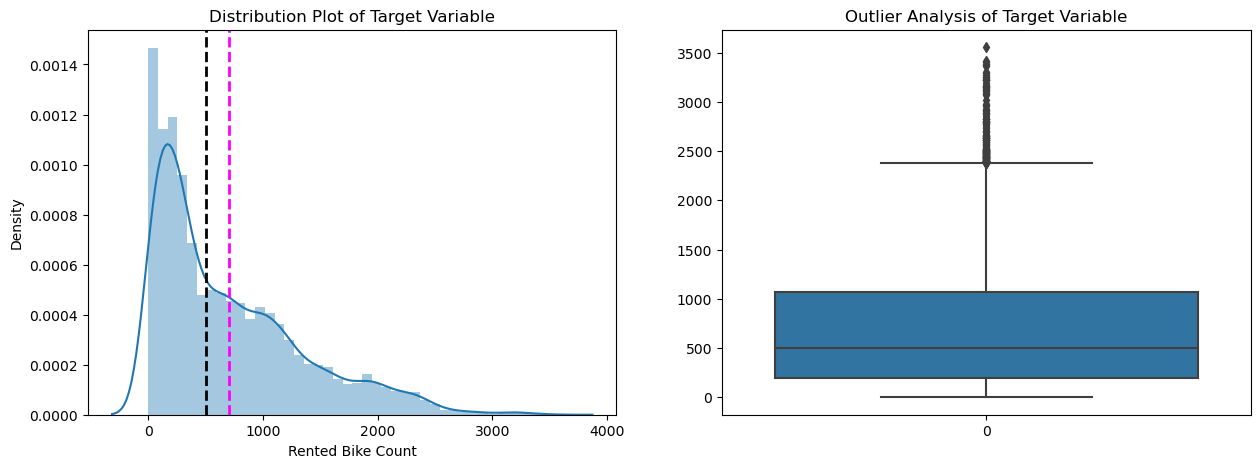

In [79]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

dist =sns.distplot(bike_df['rented_bike_count'],hist=True, ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable')

dist.axvline(bike_df['rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
dist.axvline(bike_df['rented_bike_count'].median(), color='black', linestyle='dashed', linewidth=2)

box = sns.boxplot(bike_df.rented_bike_count, ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable')
plt.show()

<Axes: xlabel='rented_bike_count', ylabel='Density'>

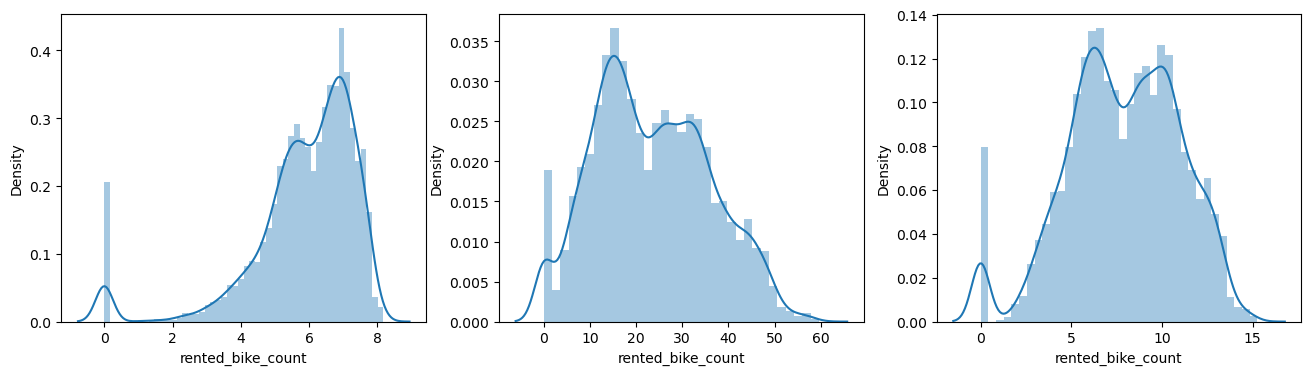

In [80]:
fig, axs = plt.subplots(1,3, figsize=(16,4))

sns.distplot(np.log1p(bike_df['rented_bike_count']),kde=True, ax=axs[0])
sns.distplot(np.sqrt(bike_df['rented_bike_count']),kde=True, ax=axs[1])
sns.distplot(np.cbrt(bike_df['rented_bike_count']),kde=True, ax=axs[2])

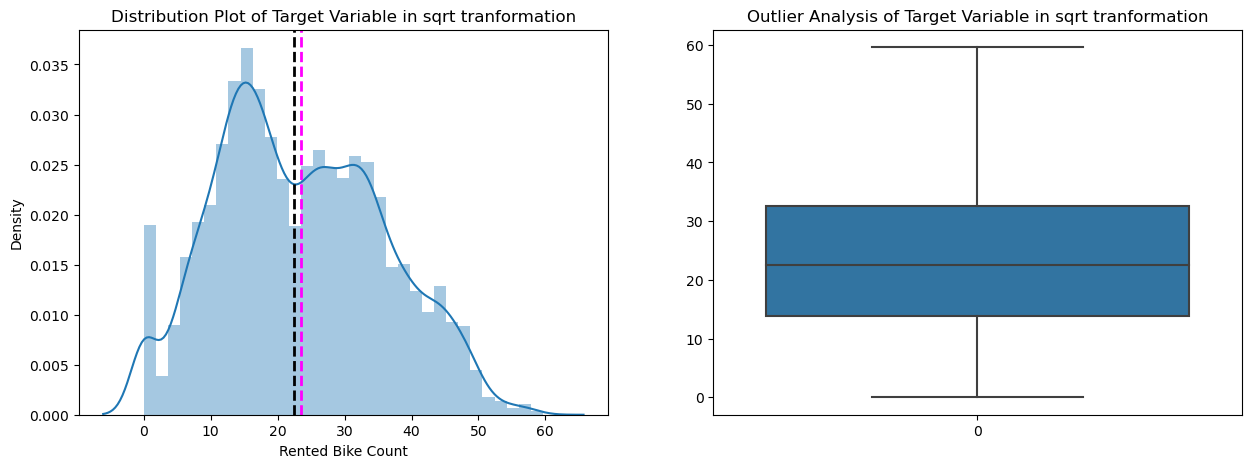

In [112]:
fig, ax = plt.subplots(1,2 , figsize = (15,5))

dist =sns.distplot(np.sqrt(bike_df['rented_bike_count']), ax = ax[0])
dist.set(xlabel = 'Rented Bike Count', ylabel ='Density', title = 'Distribution Plot of Target Variable in sqrt tranformation')

dist.axvline(np.sqrt(bike_df['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
dist.axvline(np.sqrt(bike_df['rented_bike_count']).median(), color='black', linestyle='dashed', linewidth=2)

box = sns.boxplot(np.sqrt(bike_df.rented_bike_count), ax= ax[1])
box.set(title = 'Outlier Analysis of Target Variable in sqrt tranformation')
plt.show()

In [82]:
X = bike_df.drop('rented_bike_count', axis=1)
y= np.sqrt(bike_df['rented_bike_count']) 

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


In [84]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
model_result = []

def predict(ml_model,model_name):

  '''
  Pass the model and predict value. 
  Function will calculate all the evaluation metrics and appending those metrics score on model_result list.
  Plotting different graphs for test data.
  ''' 

  model = ml_model.fit(X_train,y_train)

  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  y_train_pred_original = np.power(y_train_pred, 2)
  y_test_pred_original = np.power(y_test_pred, 2)

  sns.regplot(x=y_test_pred, y=y_test, line_kws={'color':'red'})
  plt.xlabel('Predicted')
  plt.ylabel('Actual')

  '''Evaluation metrics on train data'''
  train_MSE  = round(mean_squared_error(y_train, y_train_pred),3)
  train_RMSE = round(np.sqrt(train_MSE),3)
  train_r2 = round(r2_score(y_train, y_train_pred),3)
  train_MAE = round(mean_absolute_error(y_train, y_train_pred),3)
  train_adj_r2 = round(1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)),3)
  print(f'train MSE : {train_MSE}')
  print(f'train RMSE : {train_RMSE}')
  print(f'train MAE : {train_MAE}')
  print(f'train R2 : {train_r2}')
  print(f'train Adj R2 : {train_adj_r2}')
  print('-'*150)

  '''Evaluation metrics on test data'''
  test_MSE  = round(mean_squared_error(y_test, y_test_pred),3)
  test_RMSE = round(np.sqrt(test_MSE),3)
  test_r2 = round(r2_score(y_test, y_test_pred),3)
  test_MAE = round(mean_absolute_error(y_test, y_test_pred),3)
  test_adj_r2 = round(1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)),3)
  print(f'test MSE : {test_MSE}')
  print(f'test RMSE : {test_RMSE}')
  print(f'test MAE : {test_MAE}')
  print(f'test R2 : {test_r2}')
  print(f'test Adj R2 : {test_adj_r2}')
  print('-'*150)

  plt.figure(figsize=(6,5))
  plt.plot((y_test_pred)[:20])
  plt.plot(np.array((y_test)[:20]))
  plt.legend(["Predicted","Actual"])
  plt.xlabel('Test Data on last 20 points')
  plt.show()
  print('-'*150)

  '''actual vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred, 'error':y_test-y_test_pred}
  print(pd.DataFrame(data=d).head().T)
  print('-'*150)

  model_result.append({'model':model_name,
                       'train MSE':train_MSE,
                       'test MSE':test_MSE,
                       'train RMSE':train_RMSE,
                       'test RMSE':test_RMSE,
                       'train MAE':train_MAE,
                       'test MAE':test_MAE,
                       'train R2':train_r2,
                       'test R2':test_r2,
                       'train Adj R2':train_adj_r2,
                       'test Adj R2':test_adj_r2})

train MSE : 54.119
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.108
test RMSE : 7.288
test MAE : 5.621
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


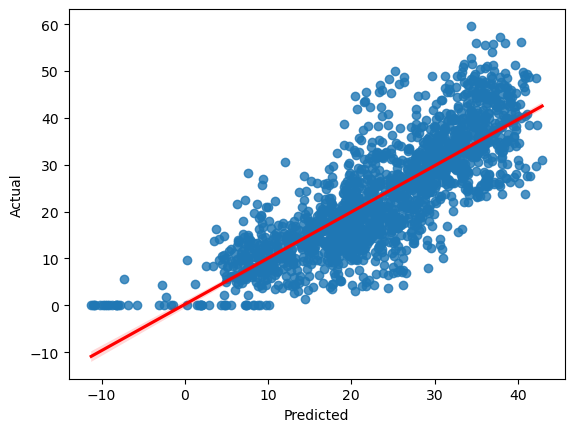

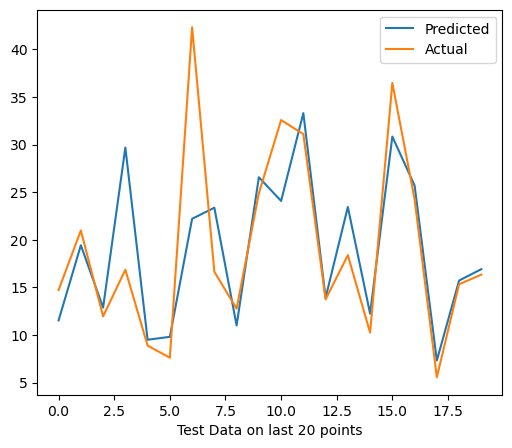

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.540867  19.427456  12.875579  29.687666  9.503256
error       3.190053   1.548721  -0.917318 -12.835366 -0.615062
------------------------------------------------------------------------------------------------------------------------------------------------------


In [86]:
predict(LinearRegression(), 'LinearRegression')

train MSE : 54.273
train RMSE : 7.367
train MAE : 5.648
train R2 : 0.652
train Adj R2 : 0.651
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.316
test RMSE : 7.302
test MAE : 5.636
test R2 : 0.647
test Adj R2 : 0.643
------------------------------------------------------------------------------------------------------------------------------------------------------


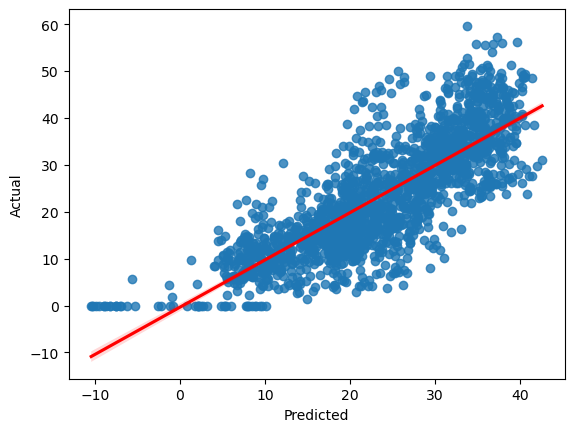

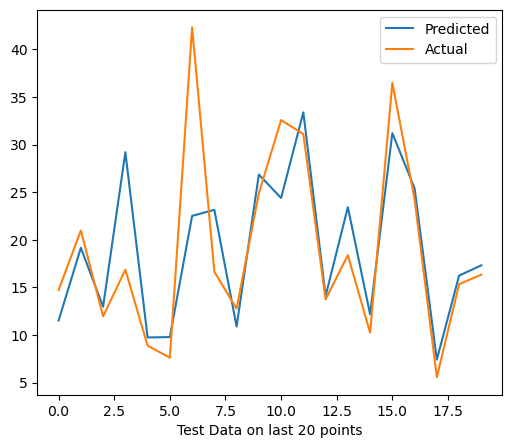

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.527884  19.156742  12.969024  29.194785  9.742650
error       3.203035   1.819435  -1.010763 -12.342486 -0.854456
------------------------------------------------------------------------------------------------------------------------------------------------------


In [87]:
predict(Lasso(alpha=0.1, max_iter=1000), 'Lasso')

train MSE : 54.119
train RMSE : 7.357
train MAE : 5.639
train R2 : 0.653
train Adj R2 : 0.652
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.108
test RMSE : 7.288
test MAE : 5.621
test R2 : 0.648
test Adj R2 : 0.645
------------------------------------------------------------------------------------------------------------------------------------------------------


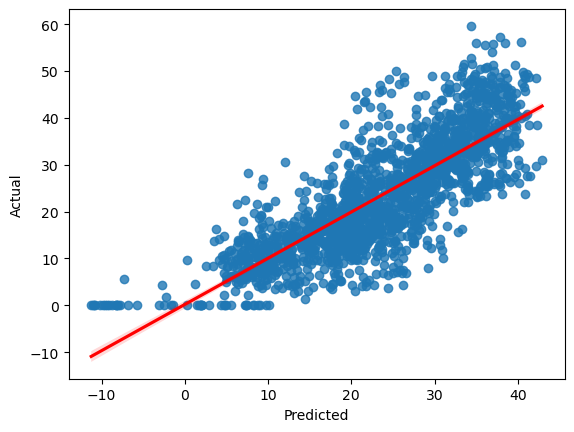

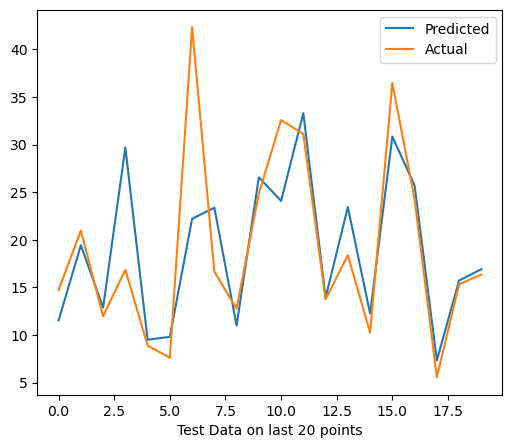

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  11.541139  19.427637  12.875583  29.687544  9.503152
error       3.189781   1.548540  -0.917322 -12.835244 -0.614958
------------------------------------------------------------------------------------------------------------------------------------------------------


In [88]:
predict(Ridge(alpha=0.1, max_iter=1000), 'Ridge')

train MSE : 54.593
train RMSE : 7.389
train MAE : 5.677
train R2 : 0.65
train Adj R2 : 0.649
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 53.911
test RMSE : 7.342
test MAE : 5.68
test R2 : 0.643
test Adj R2 : 0.639
------------------------------------------------------------------------------------------------------------------------------------------------------


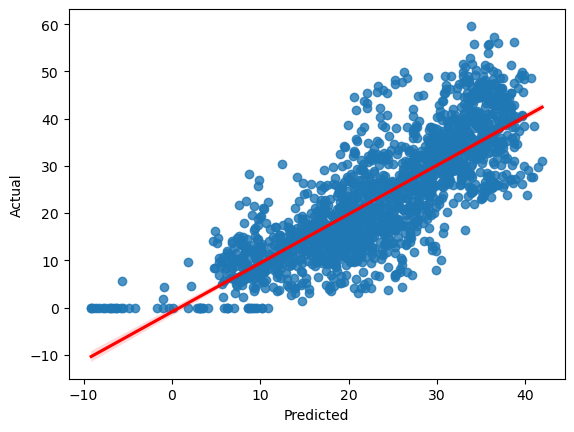

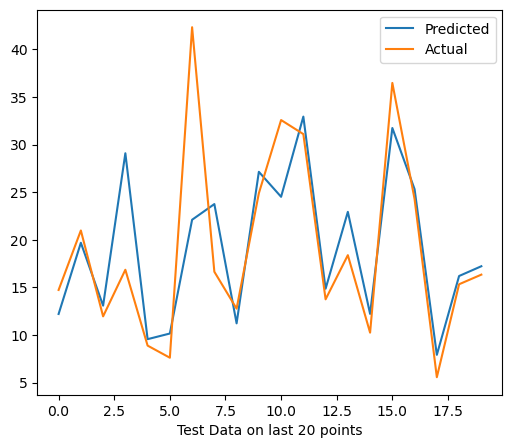

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  12.208831  19.684402  13.083575  29.085248  9.563631
error       2.522089   1.291775  -1.125315 -12.232948 -0.675436
------------------------------------------------------------------------------------------------------------------------------------------------------


In [89]:
predict(ElasticNet(alpha=0.1, max_iter=1000), 'Elastic Net')

AttributeError: 'NoneType' object has no attribute 'split'

train MSE : 20.542
train RMSE : 4.532
train MAE : 2.685
train R2 : 0.868
train Adj R2 : 0.868
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 26.094
test RMSE : 5.108
test MAE : 3.326
test R2 : 0.827
test Adj R2 : 0.825
------------------------------------------------------------------------------------------------------------------------------------------------------


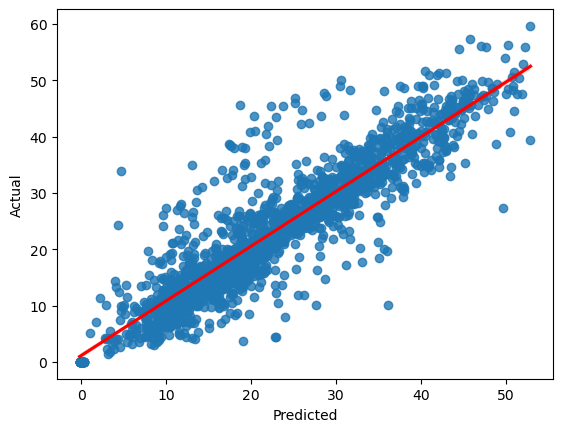

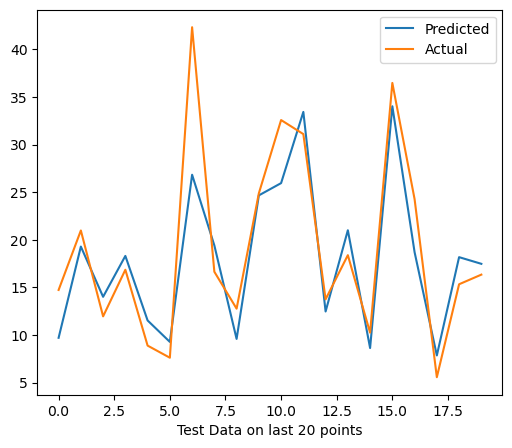

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813       1708
y_actual   14.730920  20.976177  11.958261  16.852300   8.888194
y_predict   9.706634  19.286284  14.011428  18.305715  11.528854
error       5.024286   1.689893  -2.053167  -1.453416  -2.640660
------------------------------------------------------------------------------------------------------------------------------------------------------


In [92]:
predict(SVR(kernel='rbf',C=100), 'SVM')

train MSE : 15.422
train RMSE : 3.927
train MAE : 2.736
train R2 : 0.901
train Adj R2 : 0.901
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 20.416
test RMSE : 4.518
test MAE : 3.157
test R2 : 0.865
test Adj R2 : 0.863
------------------------------------------------------------------------------------------------------------------------------------------------------


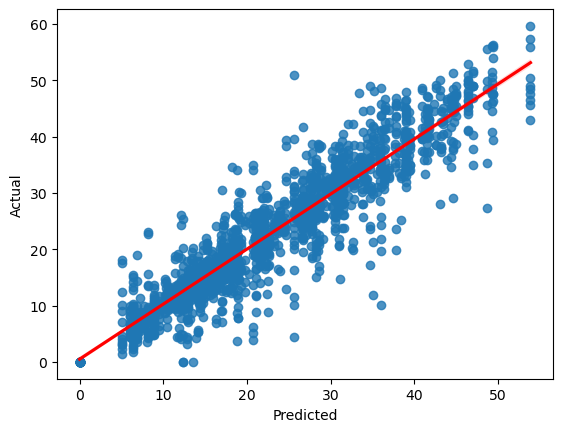

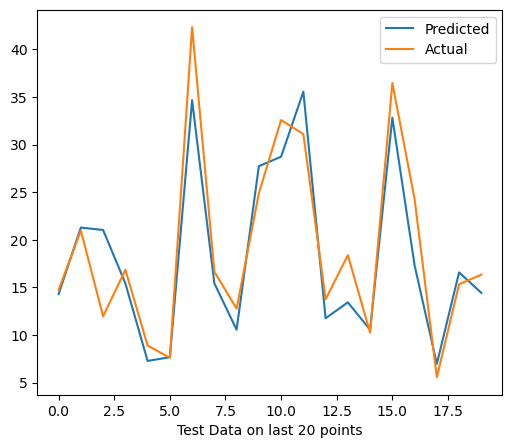

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.290624  21.283637  21.024986  15.430529  7.277687
error       0.440296  -0.307460  -9.066725   1.421771  1.610507
------------------------------------------------------------------------------------------------------------------------------------------------------


In [93]:
predict(DecisionTreeRegressor(min_samples_leaf=20, min_samples_split=3,max_depth=20, random_state=33), 'Decision Tree')

In [94]:
param_grid = {'n_estimators': [50,80],       
             'max_depth': [15,20],           
             'min_samples_split': [5,15],    
             'min_samples_leaf': [3,5]}     


rf = RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [15, 20], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 15],
                         'n_estimators': [50, 80]},
             scoring='r2')

In [95]:
rf_optimal_model = grid_search.best_estimator_
rf_optimal_model

RandomForestRegressor(max_depth=15, min_samples_leaf=3, min_samples_split=15,
                      n_estimators=80)

train MSE : 8.103
train RMSE : 2.847
train MAE : 1.923
train R2 : 0.948
train Adj R2 : 0.948
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 15.354
test RMSE : 3.918
test MAE : 2.688
test R2 : 0.898
test Adj R2 : 0.897
------------------------------------------------------------------------------------------------------------------------------------------------------


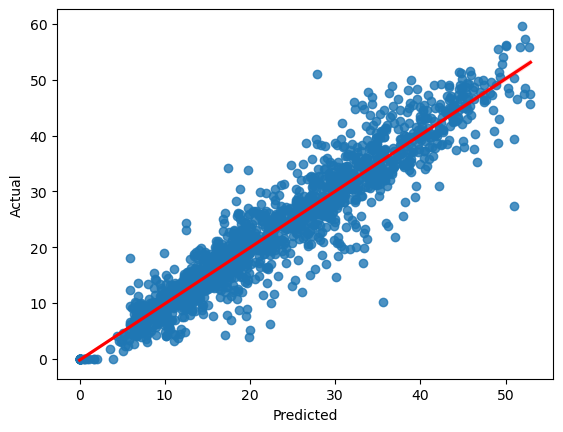

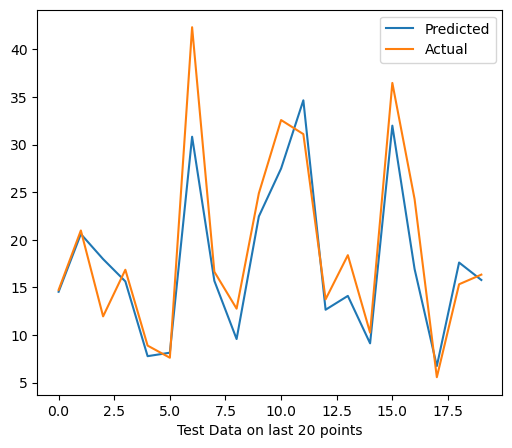

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  14.540317  20.605508  17.971463  15.631929  7.778110
error       0.190603   0.370669  -6.013203   1.220371  1.110084
------------------------------------------------------------------------------------------------------------------------------------------------------


In [96]:
predict(rf_optimal_model, 'Random Forest')

In [97]:
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature            0.279983
0              hour            0.262207
9   functioning_day            0.179961
6          rainfall            0.086891
2          humidity            0.069445
15   seasons_Winter            0.046534
5   solar_radiation            0.027295
12   seasons_Autumn            0.009199
10              day            0.008957
4        visibility            0.007838
11            month            0.006600
3        wind_speed            0.006592
13   seasons_Spring            0.004059
7          snowfall            0.001987
8           holiday            0.001569
14   seasons_Summer            0.000882

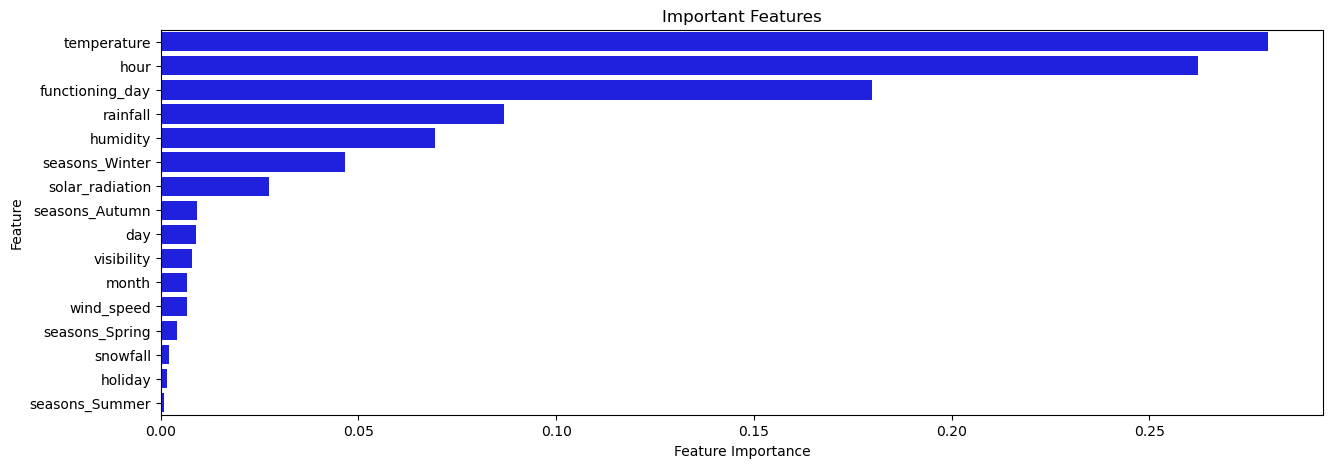

In [98]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

train MSE : 2.306
train RMSE : 1.519
train MAE : 1.138
train R2 : 0.985
train Adj R2 : 0.985
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 14.389
test RMSE : 3.793
test MAE : 2.596
test R2 : 0.905
test Adj R2 : 0.904
------------------------------------------------------------------------------------------------------------------------------------------------------


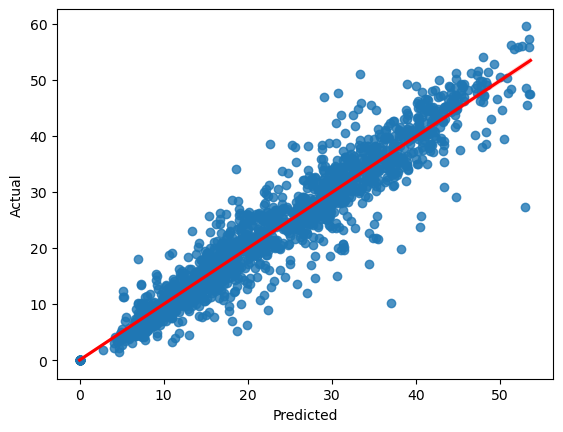

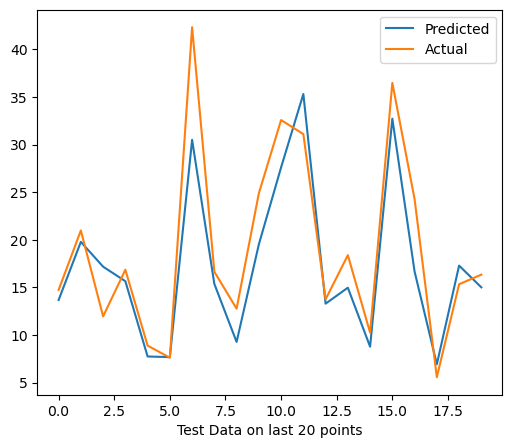

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  13.674794  19.778530  17.175564  15.650609  7.745967
error       1.056126   1.197647  -5.217303   1.201690  1.142228
------------------------------------------------------------------------------------------------------------------------------------------------------


In [99]:
dt = DecisionTreeRegressor(max_depth=12)

ada = AdaBoostRegressor(base_estimator=dt, n_estimators=60, learning_rate=1, random_state =33)

predict(ada, 'AdaBoost')

In [100]:
param_grid = {'n_estimators': [300,500],     
             'max_depth': [7,8],             
             'min_samples_split': [3,5],   
             'min_samples_leaf': [3,5]}      


xgb = XGBRegressor()

grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'max_depth': [7, 8], 'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [300, 500]},
             scoring='r2')

In [101]:
xgb_optimal_model = grid_search.best_estimator_
xgb_optimal_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, min_samples_leaf=3, min_samples_split=3,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=300, n_jobs=None, ...)

train MSE : 0.07
train RMSE : 0.265
train MAE : 0.18
train R2 : 1.0
train Adj R2 : 1.0
------------------------------------------------------------------------------------------------------------------------------------------------------
test MSE : 11.524
test RMSE : 3.395
test MAE : 2.273
test R2 : 0.924
test Adj R2 : 0.923
------------------------------------------------------------------------------------------------------------------------------------------------------


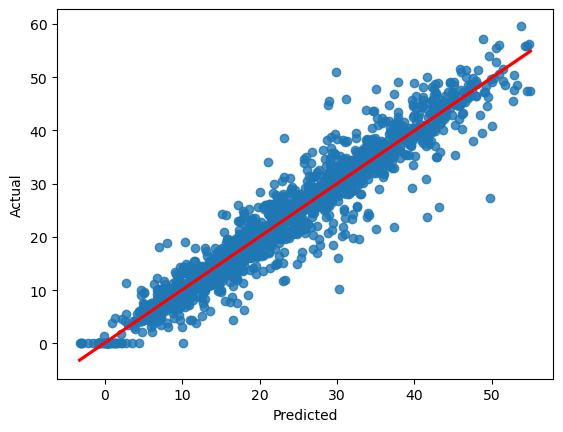

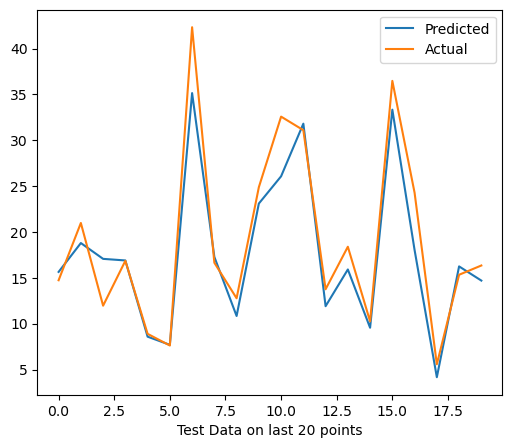

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.640075  18.787737  17.063442  16.890543  8.579092
error      -0.909155   2.188440  -5.105181  -0.038243  0.309102
------------------------------------------------------------------------------------------------------------------------------------------------------


In [102]:
predict(xgb_optimal_model, 'XGB')

In [103]:
importances = xgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
9   functioning_day            0.506654
15   seasons_Winter            0.348386
6          rainfall            0.068379
1       temperature            0.016173
0              hour            0.016047
12   seasons_Autumn            0.011387
8           holiday            0.007581
2          humidity            0.006061
5   solar_radiation            0.005394
14   seasons_Summer            0.003088
7          snowfall            0.002920
11            month            0.002158
10              day            0.001959
13   seasons_Spring            0.001660
4        visibility            0.001214
3        wind_speed            0.000940

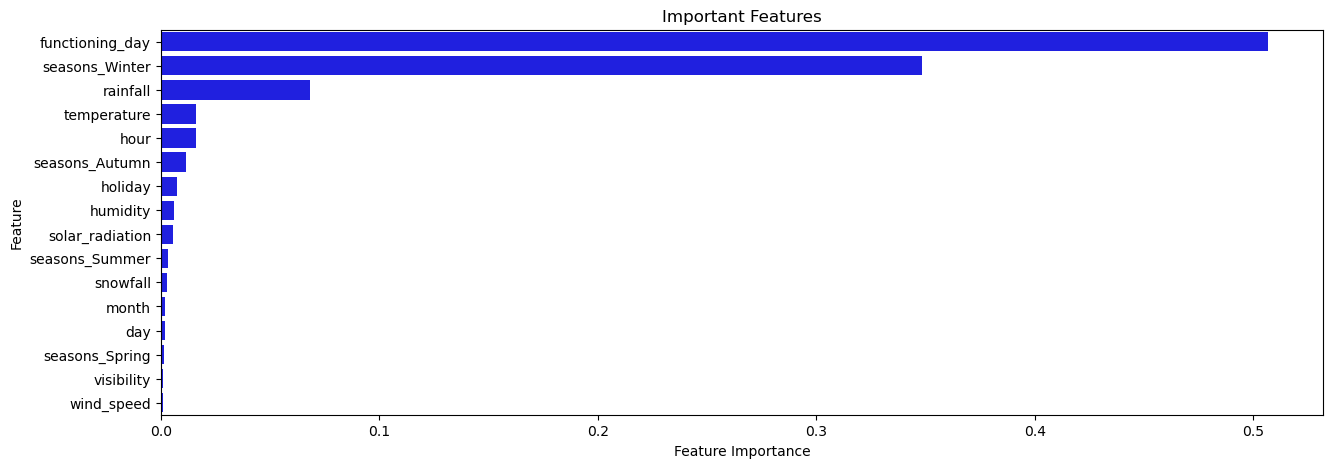

In [104]:
plt.figure(figsize=(15,5))
bar = sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

In [105]:
param_grid = {'n_estimators': [600,800],     
             'max_depth': [8,10],            
             'min_samples_split': [3,5],     
             'min_samples_leaf': [2,3]}      
.

lgb = LGBMRegressor()

grid_search = GridSearchCV(lgb, param_grid=param_grid, cv=5, scoring='r2')

grid_search.fit(X, y)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=2. Current value: min_data_in_leaf=2
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1000
[LightGBM] [Info] Number of data points in the train set: 7008, numb

GridSearchCV(cv=5, estimator=LGBMRegressor(),
             param_grid={'max_depth': [8, 10], 'min_samples_leaf': [2, 3],
                         'min_samples_split': [3, 5],
                         'n_estimators': [600, 800]},
             scoring='r2')

In [106]:
lgb_optimal_model = grid_search.best_estimator_
lgb_optimal_model

LGBMRegressor(max_depth=8, min_samples_leaf=3, min_samples_split=3,
              n_estimators=600)

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=3. Current value: min_data_in_leaf=3
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002022 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1018
[LightGBM] [Info] Number of data points in the train set: 7008, number of used features: 16
[LightGBM] [Info] Start training from sc

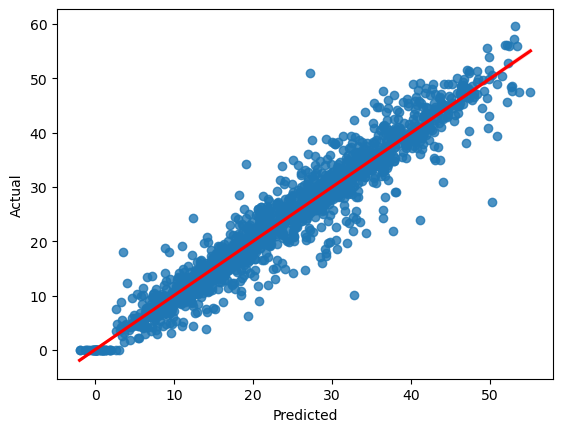

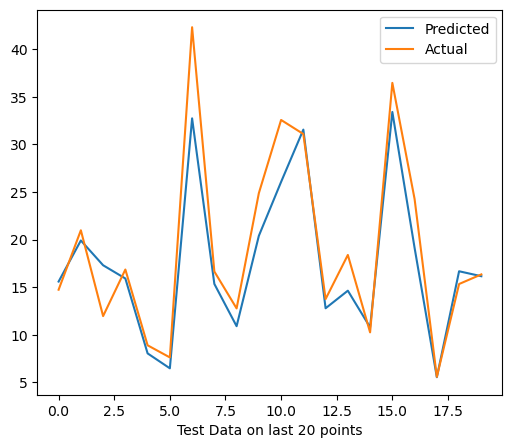

------------------------------------------------------------------------------------------------------------------------------------------------------
                1425       7993       897        5813      1708
y_actual   14.730920  20.976177  11.958261  16.852300  8.888194
y_predict  15.586568  19.903737  17.301467  15.909674  8.037663
error      -0.855648   1.072440  -5.343206   0.942626  0.850531
------------------------------------------------------------------------------------------------------------------------------------------------------


In [107]:
predict(lgb_optimal_model, 'LGB')

In [108]:
importances = lgb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

Feature  Feature Importance
1       temperature                3178
2          humidity                2398
0              hour                2286
4        visibility                2221
10              day                2007
3        wind_speed                1755
5   solar_radiation                1594
11            month                1185
6          rainfall                 427
12   seasons_Autumn                 171
8           holiday                 170
7          snowfall                 158
9   functioning_day                 151
13   seasons_Spring                 133
14   seasons_Summer                 101
15   seasons_Winter                  65

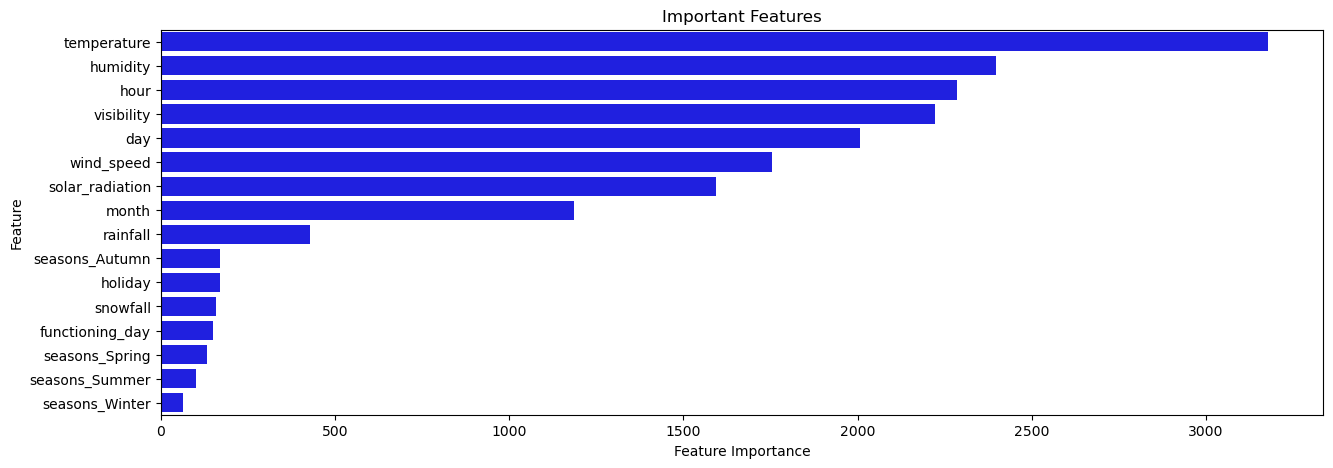

In [109]:
plt.figure(figsize=(15,5))
bar=sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
bar.set_title('Important Features')
plt.show()

In [110]:
model_result = pd.DataFrame(model_result)

model_result.sort_values(by='test R2', ascending=False)

model  train MSE  test MSE  train RMSE  test RMSE  train MAE  \
9               LGB      1.290    11.058       1.136      3.325      0.805   
8               XGB      0.070    11.524       0.265      3.395      0.180   
7          AdaBoost      2.306    14.389       1.519      3.793      1.138   
6     Random Forest      8.103    15.354       2.847      3.918      1.923   
5     Decision Tree     15.422    20.416       3.927      4.518      2.736   
4               SVM     20.542    26.094       4.532      5.108      2.685   
0  LinearRegression     54.119    53.108       7.357      7.288      5.639   
2             Ridge     54.119    53.108       7.357      7.288      5.639   
1             Lasso     54.273    53.316       7.367      7.302      5.648   
3       Elastic Net     54.593    53.911       7.389      7.342      5.677   

   test MAE  train R2  test R2  train Adj R2  test Adj R2  
9     2.193     0.992    0.927         0.992        0.926  
8     2.273     1.000    0.924         1.000        0.923  
7     2.596     0.985    0.905         0.985        0.904  
6     2.688     0.948    0.898         0.948        0.897  
5     3.157     0.901    0.865         0.901        0.863  
4     3.326     0.868    0.827         0.868        0.825  
0     5.621     0.653    0.648         0.652        0.645  
2     5.621     0.653    0.648         0.652        0.645  
1     5.636     0.652    0.647         0.651        0.643  
3     5.680     0.650    0.643         0.649        0.639

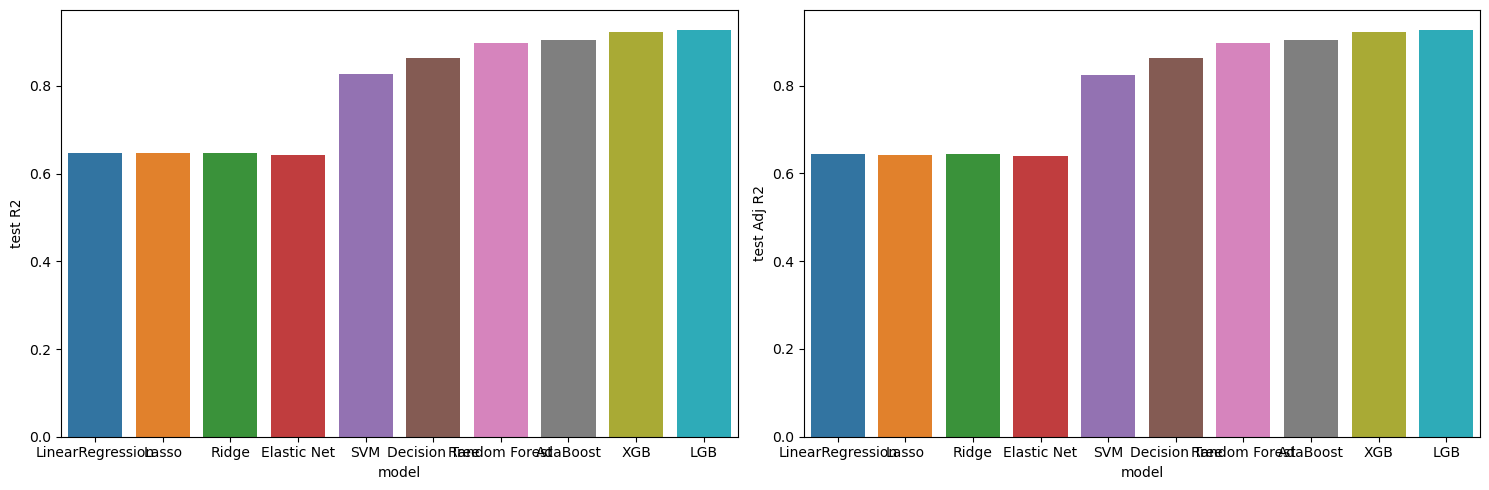

In [111]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test R2'], ax=ax[0])           # Model Vs test R2
sns.barplot(x=model_result['model'], y=model_result['test Adj R2'], ax=ax[1])       # Model Vs test Adj R2
plt.tight_layout()